In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc("font", family = "serif",size=20)
rc("figure",figsize=(9,6))
rc("figure",facecolor="white")
%config InlineBackend.figure_format = 'retina'
from sklearn.utils import shuffle
import seaborn as sns
from scipy.spatial.distance import cdist
from scipy.stats import pearsonr

%load_ext autoreload
%autoreload 2
from matching import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
indep,dep,true_df,matching_cols,exact_cols = gen_fake_data()

In [21]:
out = []
indep_group = indep.groupby(exact_cols)
dep_group = dep.groupby(exact_cols)
for key in dep_group.groups.keys():
    dep_dat = dep.loc[dep_group.groups[key],:]
    indep_dat = indep.loc[indep_group.groups[key],:]
    out.append(match_within_group(indep_dat,dep_dat,matching_cols,metric='mahalanobis'))

In [22]:
concat = pd.concat(out)
concat.groupby(exact_cols).mean() - true_df[exact_cols+['dep','indep']].groupby(exact_cols).mean()

dep  dist     indep
country gender                     
0.0     0.0     0.0   NaN  0.000000
        1.0     0.0   NaN -0.118613
1.0     0.0     0.0   NaN  0.000000
        1.0     0.0   NaN  0.000000
2.0     0.0     0.0   NaN  0.000935
        1.0     0.0   NaN  0.000000

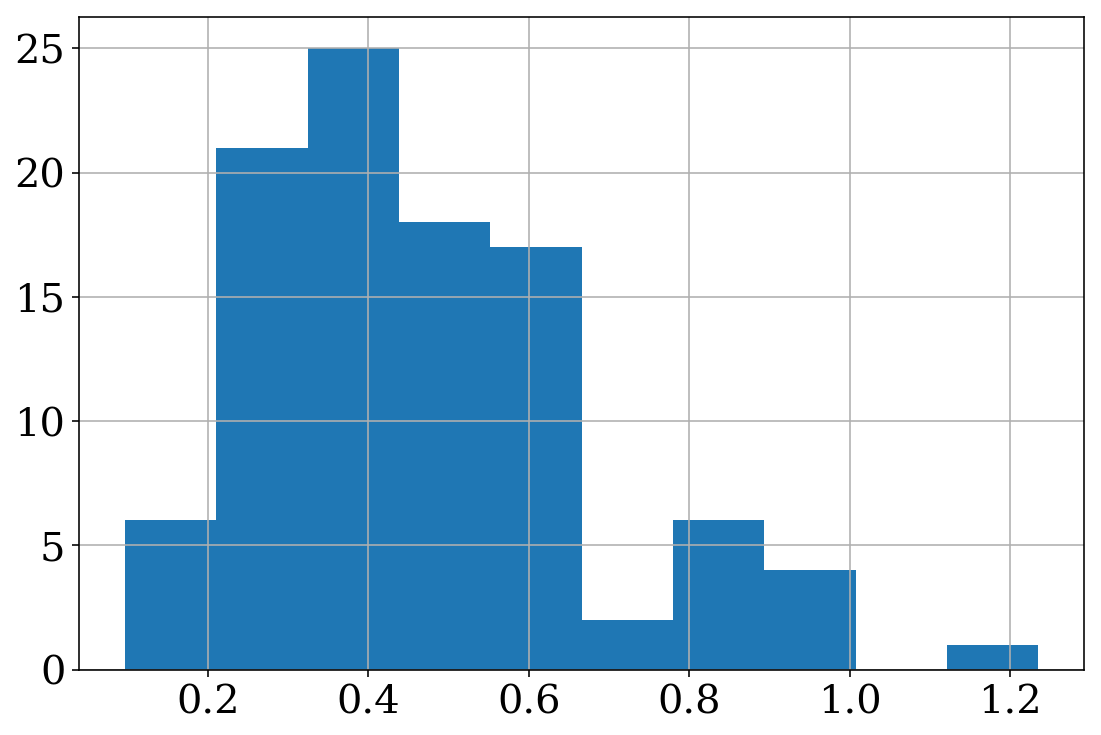

In [24]:
concat.dist